In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df21 = pd.read_excel('../excels/2.xlsx', sheet_name='2023年的农作物种植情况')
df21.fillna(method='ffill', inplace=True)
print(df21)
df22 = pd.read_excel('../excels/2.xlsx', sheet_name='2023年统计的相关数据')
# print(df2)

   种植地块  作物编号 作物名称    作物类型  种植面积/亩 种植季次  地块类型
0    A1     6   小麦      粮食    80.0   单季   平旱地
1    A2     7   玉米      粮食    55.0   单季   平旱地
2    A3     7   玉米      粮食    35.0   单季   平旱地
3    A4     1   黄豆  粮食（豆类）    72.0   单季   平旱地
4    A5     4   绿豆  粮食（豆类）    68.0   单季   平旱地
5    A6     8   谷子      粮食    55.0   单季   平旱地
6    B1     6   小麦      粮食    60.0   单季    梯田
7    B2     2   黑豆  粮食（豆类）    46.0   单季    梯田
8    B3     3   红豆  粮食（豆类）    40.0   单季    梯田
9    B4     4   绿豆  粮食（豆类）    28.0   单季    梯田
10   B5     5   爬豆  粮食（豆类）    25.0   单季    梯田
11   B6     8   谷子      粮食    86.0   单季    梯田
12   B7     6   小麦      粮食    55.0   单季    梯田
13   B8     8   谷子      粮食    44.0   单季    梯田
14   B9     9   高粱      粮食    50.0   单季    梯田
15  B10    10   黍子      粮食    25.0   单季    梯田
16  B11     1   黄豆  粮食（豆类）    60.0   单季    梯田
17  B12     7   玉米      粮食    45.0   单季    梯田
18  B13    14   莜麦      粮食    35.0   单季    梯田
19  B14    15   大麦      粮食    20.0   单季    梯田
20   C1    11   荞麦      粮食    15.0

In [5]:
# 按照 '作物编号' 和 '地块类型' 进行分组，并对 '种植面积/亩' 进行求和
result1 = df21.groupby(['作物编号', '地块类型', '种植季次'])['种植面积/亩'].sum().reset_index()
# 重命名列，以便清晰地表示数据
result1.columns = ['作物编号', '地块类型', '种植季次', '种植面积/亩']
print(result1)
# 使用 merge 方法进行匹配，并包含作物名称
merged_df = pd.merge(result1, df22[['作物编号', '作物名称','作物类型' , '地块类型', '种植季次', '亩产量/斤', '种植成本/(元/亩)', '销售单价/(元/斤)']], on=['作物编号', '种植季次', '地块类型'], how='left')

# 计算总产量/斤
merged_df['单地块类型总产量/斤'] = merged_df['种植面积/亩'] * merged_df['亩产量/斤']

# 计算销售单价平均值
def calculate_average_price(price_str):
    prices = list(map(float, price_str.split('-')))
    return sum(prices) / len(prices)

merged_df['销售单价平均值'] = merged_df['销售单价/(元/斤)'].apply(calculate_average_price)

# 计算每个地块类型的利润
merged_df['利润'] = (merged_df['销售单价平均值'] * merged_df['单地块类型总产量/斤']) - (merged_df['种植成本/(元/亩)'] * merged_df['种植面积/亩'])
merged_df['每亩利润'] = merged_df['利润'] / merged_df['种植面积/亩']
# print(merged_df)

# 按照 '作物编号' 和 '作物名称' 进行分组，并对 '利润' 进行求和
total_profit = merged_df.groupby(['作物编号', '作物名称'])[['利润', '每亩利润']].sum().reset_index()

# 重命名列，以便清晰地表示数据
total_profit.columns = ['作物编号', '作物名称', '总利润/元', '每亩总利润/元']

# 打印 total_profit
# print(total_profit)

# 按照 '作物编号' 和 '作物名称' 进行分组，并对 '总产量/斤' 进行求和
total_yield = merged_df.groupby(['作物编号', '作物名称'])['单地块类型总产量/斤'].sum().reset_index()

# 重命名列，以便清晰地表示数据
total_yield.columns = ['作物编号', '作物名称', '总产量/斤']

# 打印 total_yield
# print(total_yield)


    作物编号  地块类型 种植季次  种植面积/亩
0      1   山坡地   单季    15.0
1      1   平旱地   单季    72.0
2      1    梯田   单季    60.0
3      2    梯田   单季    46.0
4      3   山坡地   单季    20.0
5      3    梯田   单季    40.0
6      4   平旱地   单季    68.0
7      4    梯田   单季    28.0
8      5    梯田   单季    25.0
9      6   山坡地   单季    27.0
10     6   平旱地   单季    80.0
11     6    梯田   单季   115.0
12     7   平旱地   单季    90.0
13     7    梯田   单季    45.0
14     8   平旱地   单季    55.0
15     8    梯田   单季   130.0
16     9    梯田   单季    50.0
17    10    梯田   单季    25.0
18    11   山坡地   单季    15.0
19    12   山坡地   单季    13.0
20    13   山坡地   单季    18.0
21    14    梯田   单季    35.0
22    15    梯田   单季    20.0
23    16   水浇地   单季    42.0
24    17  普通大棚  第一季     1.2
25    17  智慧大棚  第一季     0.6
26    17   水浇地  第一季    10.0
27    18  普通大棚  第一季     1.2
28    18   水浇地  第一季    12.0
29    19  普通大棚  第一季     1.2
30    19  智慧大棚  第一季     0.6
31    20   水浇地  第一季    15.0
32    21  普通大棚  第一季     0.6
33    21  智慧大棚  第二季     0.3
34    21   水浇地  第一季 

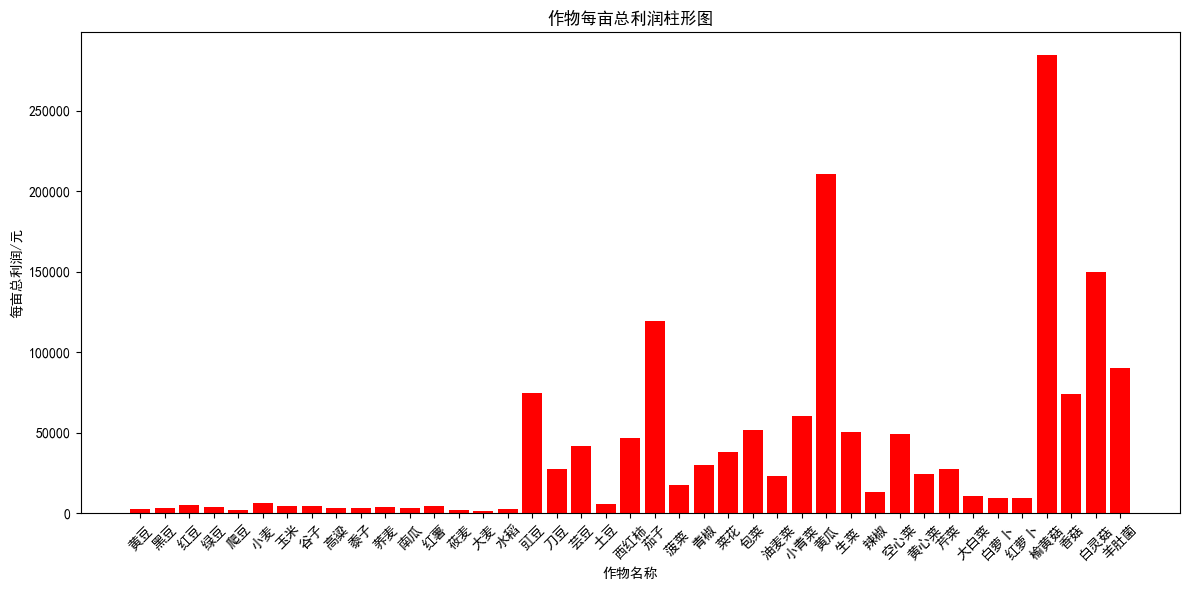

In [71]:
# 绘制柱形图
plt.figure(figsize=(12, 6))
plt.bar(total_profit['作物名称'], total_profit['每亩总利润/元'], color='red')

# 添加标题和标签
plt.title('作物每亩总利润柱形图')
plt.xlabel('作物名称')
plt.ylabel('每亩总利润/元')

# 显示图形
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.tight_layout()  # 自动调整子图参数以使图形适合区域
plt.show()

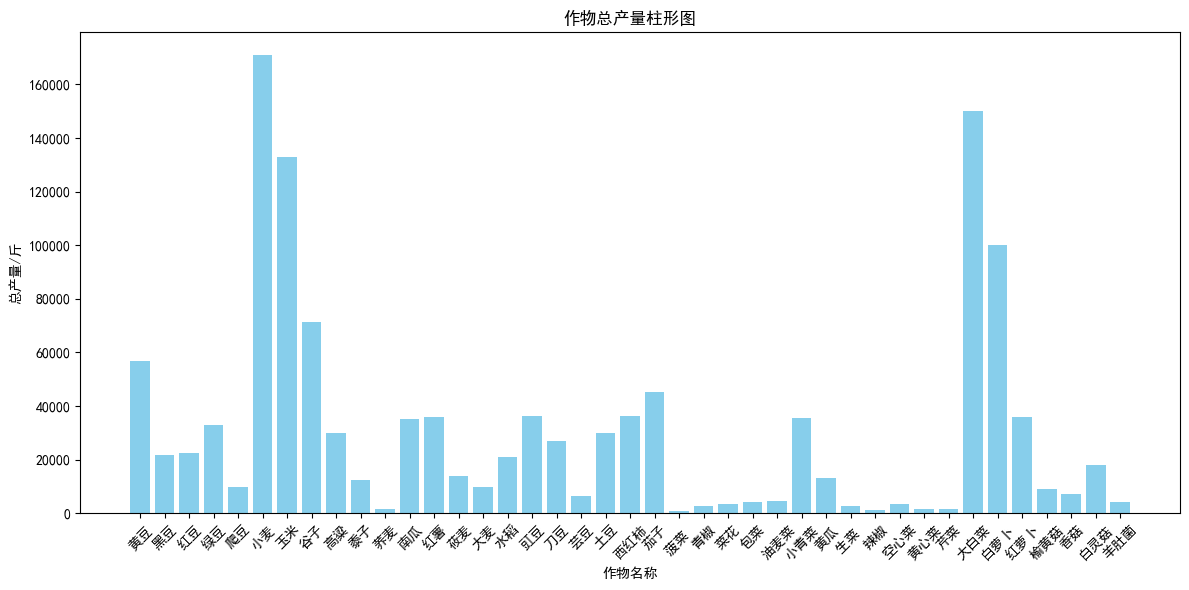

In [72]:
# 绘制柱形图
plt.figure(figsize=(12, 6))
plt.bar(total_yield['作物名称'], total_yield['总产量/斤'], color='skyblue')

# 添加标题和标签
plt.title('作物总产量柱形图')
plt.xlabel('作物名称')
plt.ylabel('总产量/斤')

# 显示图形
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.tight_layout()  # 自动调整子图参数以使图形适合区域
plt.show()

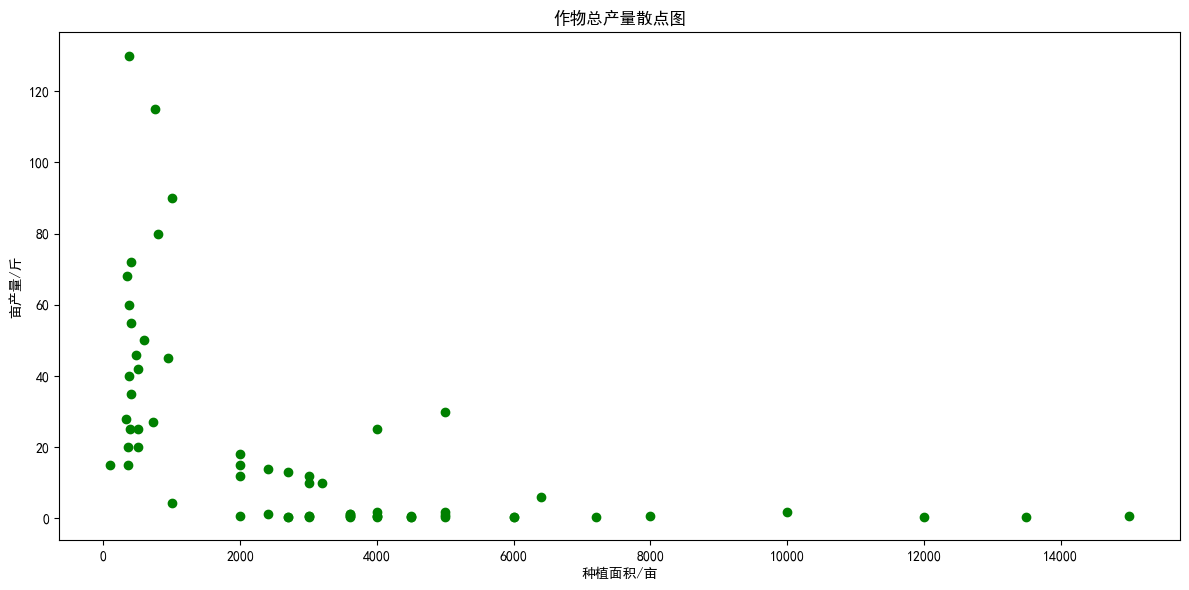

In [73]:
# 创建一个颜色列表，根据作物类型设置颜色
# colors = ['red' if crop_type == '粮食（豆类）' else 'green' for crop_type in merged_df['作物类型']]

plt.figure(figsize=(12, 6))
# plt.scatter(merged_df['亩产量/斤'], merged_df['种植面积/亩'], color=colors)
plt.scatter(merged_df['亩产量/斤'], merged_df['种植面积/亩'], color='green')

# 添加标题和标签
plt.title('作物总产量散点图')
plt.xlabel('种植面积/亩')
plt.ylabel('亩产量/斤')

# 显示图形
plt.tight_layout()  # 自动调整子图参数以使图形适合区域
plt.show()

<Figure size 1200x600 with 0 Axes>

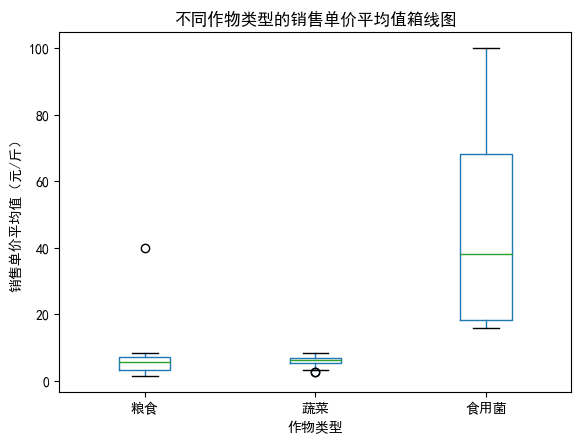

In [74]:
# 归类作物类型
def categorize_crop_type(crop_type):
    if '粮食' in crop_type:
        return '粮食'
    elif '蔬菜' in crop_type:
        return '蔬菜'
    elif '食用菌' in crop_type:
        return '食用菌'
    else:
        return '其他'

merged_df['归类作物类型'] = merged_df['作物类型'].apply(categorize_crop_type)

# 绘制箱线图
plt.figure(figsize=(12, 6))
merged_df.boxplot(column='销售单价平均值', by='归类作物类型', grid=False)

# 添加标题和标签
plt.title('不同作物类型的销售单价平均值箱线图')
plt.suptitle('')  # 去掉默认的标题
plt.xlabel('作物类型')
plt.ylabel('销售单价平均值（元/斤）')

plt.show()

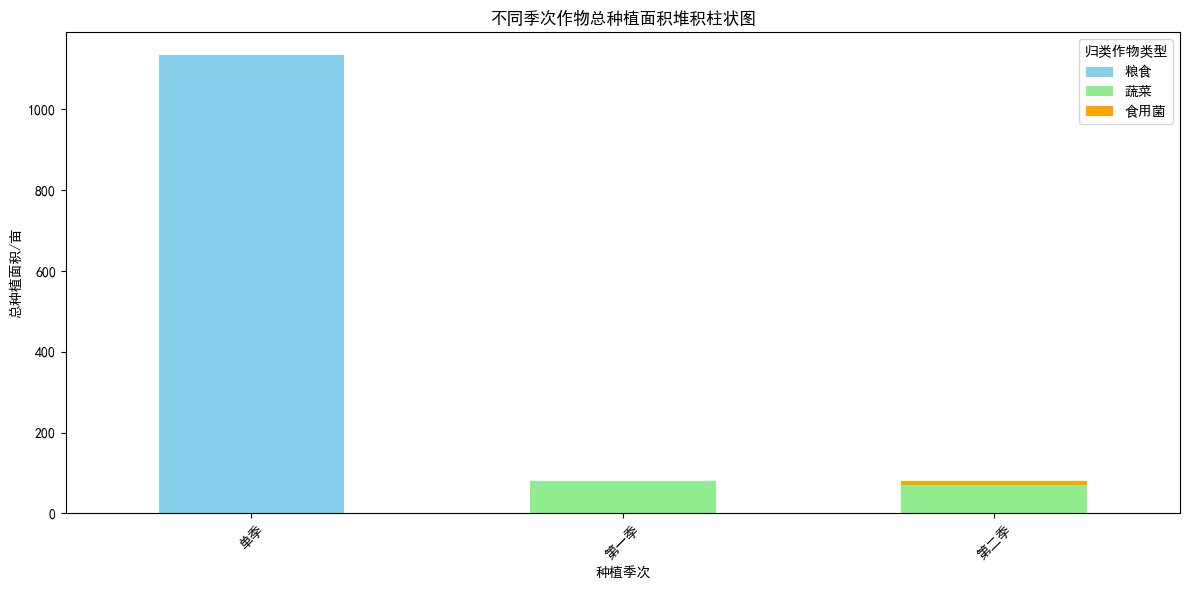

In [75]:
# 按照种植季次和归类作物类型对种植面积进行求和
seasonal_area_sum = merged_df.groupby(['种植季次', '归类作物类型'])['种植面积/亩'].sum().unstack().fillna(0)

# 绘制堆积柱形图
seasonal_area_sum.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen', 'orange', 'grey'])

# 添加标题和标签
plt.title('不同季次作物总种植面积堆积柱状图')
plt.xlabel('种植季次')
plt.ylabel('总种植面积/亩')

# 显示图形
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.tight_layout()  # 自动调整子图参数以使图形适合区域
plt.show()